In [2]:
import pandas as pd
import numpy as np
import joblib
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, root_mean_squared_error
from matplotlib import gridspec
from plots import plot_scatter, plot_histograms
from plot_violin_box import set_plot_style

In [3]:
train_data = pd.read_csv('training data.csv')
test_data = pd.read_csv('test data.csv')
xtrain = train_data.drop(columns = ['DCAN'], axis =1)
ytrain = train_data['DCAN'].values

xtest = test_data.drop(columns = ['DCAN'], axis =1)
ytest = test_data['DCAN'].values

model1 = joblib.load('catboost_model1.pkl')
model2 = joblib.load('catboost_model2.pkl')



train_prediction1 = model1.predict(xtrain)
test_prediction1 = model1.predict(xtest)
train_r2_1 = r2_score(ytrain, train_prediction1)
test_r2_1 = r2_score(ytest, test_prediction1)

train_prediction2 = model2.predict(xtrain)
test_prediction2 = model2.predict(xtest)
train_r2_2 = r2_score(ytrain, train_prediction2)
test_r2_2 = r2_score(ytest, test_prediction2)


print(f'model1 training and test R2 value:. {train_r2_1:.2f} and {test_r2_1:.2f}')
print(f'model2 training and test R2 value:. {train_r2_2:.2f} and {test_r2_2:.2f}')


model1 training and test R2 value:. 0.89 and 0.77
model2 training and test R2 value:. 0.88 and 0.79


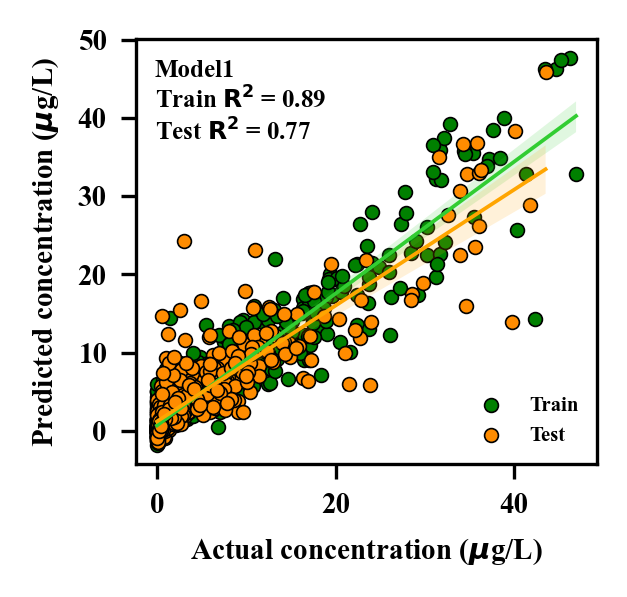

In [4]:
set_plot_style(size = 7)
fig, ax = plt.subplots(figsize=(2.1, 2), dpi = 300)

ax.scatter(ytrain, train_prediction1, s = 11, color = 'green', edgecolor = 'black', linewidth = 0.4, label = 'Train')
sns.regplot(x = ytrain, y = train_prediction1, scatter=False, color = 'limegreen', line_kws={"linewidth": 0.9})

ax.scatter(ytest, test_prediction1, s = 11, color = 'darkorange', edgecolor = 'black', linewidth = 0.4, label = 'Test')
sns.regplot(x = ytest, y = test_prediction1, scatter=False, color = 'orange', line_kws={"linewidth": 0.9})
ax.set_xlabel('Actual concentration ($\mu$g/L)', fontweight = 'bold')
ax.set_ylabel('Predicted concentration ($\mu$g/L)', fontweight = 'bold')

ax.legend(loc = 'lower right', frameon = False, fontsize=5)

text_str = "Model1\nTrain $\mathrm{R}^2$ = 0.89\nTest $\mathrm{R}^2$ = 0.77"
ax.text(0.04, 0.95, text_str, transform=ax.transAxes,
             fontsize=6, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='white', facecolor='white'))
plt.tight_layout()
#plt.savefig('model1 prediction.png')

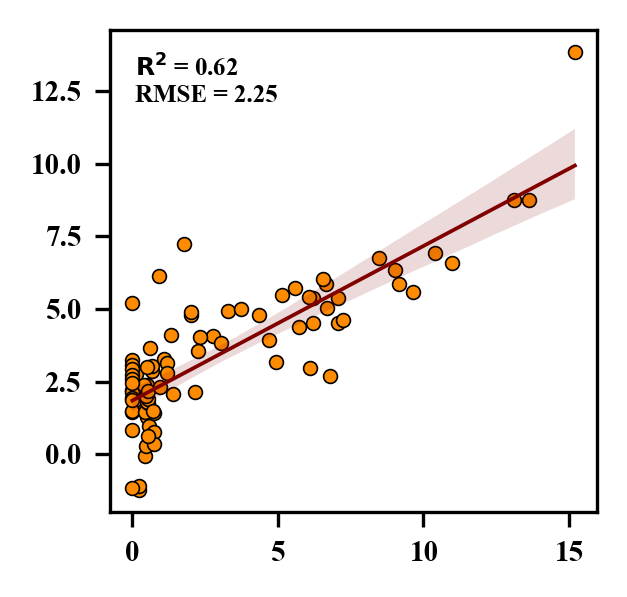

In [5]:
set_plot_style(size = 7)
fig, ax = plt.subplots(figsize=(2.1, 2), dpi = 300)
xtest_data = pd.read_csv('24 external RI values weighted_0.25 V4.csv')

ax.scatter(xtest_data['DCAN'], xtest_data['prediction'], s = 11, color = 'darkorange', edgecolor = 'black', linewidth = 0.4)
sns.regplot(x=xtest_data['DCAN'], y=xtest_data['prediction'], scatter=False, color = 'maroon', line_kws={"linewidth": 0.9})
ax.set_xlabel('', fontweight = 'bold')
ax.set_ylabel('', fontweight = 'bold')

text_str = "$\mathrm{R}^2$ = 0.62\nRMSE = 2.25"
ax.text(0.05, 0.95, text_str, transform=ax.transAxes,
             fontsize=6, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='white', facecolor='white'))
plt.tight_layout()
